# Understanding COVID Vaccine data through a monthly PMI wordcloud
### Author: Elisabeth Jones
### February 2021

This code uses data collected from twitter to run basic descriptives then implement a monthly PMI analysis to determine topics that were uniqely popular within each month of the data collection timeframe (May 2020 - Jan 2021). This project is a part of the COVID-19 vaccine research taking place within San Diego State University's Center for Human Dynamics in the Mobile Age (HDMA Center). 

### Importing data and cleaning 

In [1]:
#pandas
import pandas as pd
#import data frames
df1 = pd.read_csv(r"/Users/elisabethjones/GoogleDrive/Research2021/SDHealth_Vaccine/SDHealth_vaccines_0522.csv")
df2 = pd.read_csv(r"/Users/elisabethjones/GoogleDrive/Research2021/SDHealth_Vaccine/SDHealth_vaccines_0629.csv")
df3 = pd.read_csv(r"/Users/elisabethjones/GoogleDrive/Research2021/SDHealth_Vaccine/SDHealth_vaccines_0730.csv")
df4 = pd.read_csv(r"/Users/elisabethjones/GoogleDrive/Research2021/SDHealth_Vaccine/SDHealth_vaccines_0831.csv")
df5 = pd.read_csv(r"/Users/elisabethjones/GoogleDrive/Research2021/SDHealth_Vaccine/SDHealth_vaccines_1002.csv")
df6 = pd.read_csv(r"/Users/elisabethjones/GoogleDrive/Research2021/SDHealth_Vaccine/Corona_vaccine__San_Diego_County_1120.csv")

/Users/elisabethjones/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#drop extra column in df6
df6 = df6.drop(['lang'], axis=1)
#combining datasets
df = pd.concat([df1, df2, df3, df4, df5, df6])
df.count() #215114 tweets 

id                                215114
created_at                        215114
created_at_local                  215114
full_text                         215114
user.screen_name                  215114
user.name                         215101
user.location                     160684
entities.user_mentions            192442
retweeted_id                      164577
retweet_count                     170764
search_info.keywords              215114
entities.hashtags                  45827
user.id                           215114
user.verified                       6029
user.followers_count              214560
user.friends_count                214621
in_reply_to_user_id                24923
source                            215044
coordinates.coordinates               41
place.place_type                    3068
place.bounding_box.coordinates      3068
place.full_name                     3068
dtype: int64

In [3]:
#change date tweet created variable to date type
df['date'] = pd.to_datetime(df['created_at'])
#view data
df.head()

,id,created_at,created_at_local,full_text,user.screen_name,user.name,user.location,entities.user_mentions,retweeted_id,retweet_count,...,user.verified,user.followers_count,user.friends_count,in_reply_to_user_id,source,coordinates.coordinates,place.place_type,place.bounding_box.coordinates,place.full_name,date
0,1263578888845897734,2020-05-21T21:14:17.000Z,2020-05-21T14:14:17.000Z,"""$1.2 Billion From U.S. to Drugmaker to Pursue...",TrueDiagnostics,Jerry Lee,San Diego,NaN,NaN,NaN,...,NaN,377.0,394.0,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,NaN,NaN,2020-05-21 21:14:17+00:00
1,1263176962576650240,2020-05-20T18:37:11.000Z,2020-05-20T11:37:11.000Z,"""A New Entry in the Race for a Coronavirus Vac...",TrueDiagnostics,Jerry Lee,San Diego,NaN,NaN,NaN,...,NaN,377.0,394.0,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,NaN,NaN,2020-05-20 18:37:11+00:00
2,1265757299529838592,2020-05-27T21:30:31.000Z,2020-05-27T14:30:31.000Z,!!!!! There’s no new normal to get to until a ...,Andre_1k,1k,"San Diego, CA",NaN,NaN,NaN,...,NaN,1342.0,548.0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,2020-05-27 21:30:31+00:00
3,1263662726926270469,2020-05-22T02:47:26.000Z,2020-05-21T19:47:26.000Z,"""A New Entry in the Race for a Coronavirus Vac...",SharenKoran,Sharen Koran,San Diego,NaN,NaN,NaN,...,NaN,284.0,290.0,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,NaN,NaN,2020-05-22 02:47:26+00:00
4,1263192015153422336,2020-05-20T19:37:00.000Z,2020-05-20T12:37:00.000Z,"""A prototype vaccine has protected monkeys fro...",stridermcg,Shaun Trillizio-McGraw,"San Diego, CA",NaN,NaN,NaN,...,NaN,39.0,1046.0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,2020-05-20 19:37:00+00:00


### Create bar chart describing data

In [5]:
#create new df with data restructured by month
df_date = df.groupby(df['date'].dt.to_period('M')).count()
df_date = df_date.resample('M').asfreq().fillna(0)
df_date['month'] = df_date.index
df_date.head()

/Users/elisabethjones/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,id,created_at,created_at_local,full_text,user.screen_name,user.name,user.location,entities.user_mentions,retweeted_id,retweet_count,...,user.followers_count,user.friends_count,in_reply_to_user_id,source,coordinates.coordinates,place.place_type,place.bounding_box.coordinates,place.full_name,date,month
date,,,,,,,,,,,,,,,,,,,,,
2020-05,11237,11237,11237,11237,11237,11237,8468,10195,8330,8618,...,11218,11216,1741,11237,0,165,165,165,11237,2020-05
2020-06,10159,10159,10159,10159,10159,10159,7507,9287,7764,7926,...,10145,10136,1365,10159,1,141,141,141,10159,2020-06
2020-07,20466,20466,20466,20466,20466,20466,15076,18239,15320,15563,...,20358,20393,2658,20465,5,280,280,280,20466,2020-07
2020-08,17899,17899,17899,17899,17899,17893,12782,16134,13731,14237,...,17835,17858,2217,17897,2,227,227,227,17899,2020-08
2020-09,31080,31080,31080,31080,31080,31079,22669,28715,25851,26472,...,31016,30941,2543,31068,0,233,233,233,31080,2020-09


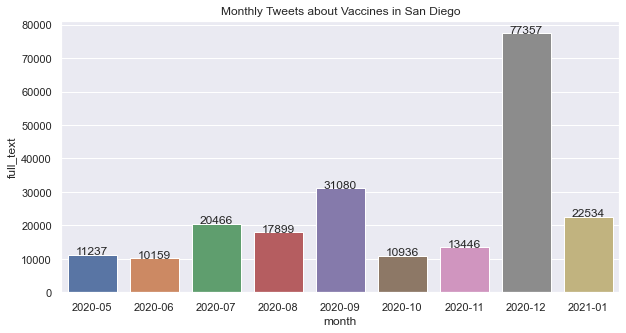

In [6]:
#seaborn and matpplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# plot vertical barplot
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='month', y='full_text', data=df_date)
ax.set(title='Monthly Tweets about Vaccines in San Diego') # title barplot

# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar for data labels
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+100, 
 s = '{:.0f}'.format(height), 
 ha = 'center') 

### Clean text for anlaysis

In [9]:
#wordcloud, string, re, numpy
from wordcloud import WordCloud, STOPWORDS
import string
import re
import numpy as np

In [10]:
#data cleaning 
#create function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    return tweet

#run function
df['cleaned_text'] = df['full_text'].apply(processTweet)

# remove special characters, numbers, punctuations
df['tidy_tweet'] = df['cleaned_text'].str.replace("[^a-zA-Z#]", " ")
df['tidy_tweet'] = df['cleaned_text'].str.replace("\\", " ");
df['bow'] = df['tidy_tweet'].str.split()
df = df[df['bow'].isnull()==False] #creating bag of words, needed for PMI
df.head()

,id,created_at,created_at_local,full_text,user.screen_name,user.name,user.location,entities.user_mentions,retweeted_id,retweet_count,...,in_reply_to_user_id,source,coordinates.coordinates,place.place_type,place.bounding_box.coordinates,place.full_name,date,cleaned_text,tidy_tweet,bow
0,1263578888845897734,2020-05-21T21:14:17.000Z,2020-05-21T14:14:17.000Z,"""$1.2 Billion From U.S. to Drugmaker to Pursue...",TrueDiagnostics,Jerry Lee,San Diego,NaN,NaN,NaN,...,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,NaN,NaN,2020-05-21 21:14:17+00:00,billion from drugmaker pursue coronavirus vacc...,billion from drugmaker pursue coronavirus vacc...,"[billion, from, drugmaker, pursue, coronavirus..."
1,1263176962576650240,2020-05-20T18:37:11.000Z,2020-05-20T11:37:11.000Z,"""A New Entry in the Race for a Coronavirus Vac...",TrueDiagnostics,Jerry Lee,San Diego,NaN,NaN,NaN,...,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,NaN,NaN,2020-05-20 18:37:11+00:00,new entry the race for coronavirus vaccine hop...,new entry the race for coronavirus vaccine hop...,"[new, entry, the, race, for, coronavirus, vacc..."
2,1265757299529838592,2020-05-27T21:30:31.000Z,2020-05-27T14:30:31.000Z,!!!!! There’s no new normal to get to until a ...,Andre_1k,1k,"San Diego, CA",NaN,NaN,NaN,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,2020-05-27 21:30:31+00:00,there’ new normal get until vaccine come out,there’ new normal get until vaccine come out,"[there’, new, normal, get, until, vaccine, com..."
3,1263662726926270469,2020-05-22T02:47:26.000Z,2020-05-21T19:47:26.000Z,"""A New Entry in the Race for a Coronavirus Vac...",SharenKoran,Sharen Koran,San Diego,NaN,NaN,NaN,...,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,NaN,NaN,2020-05-22 02:47:26+00:00,new entry the race for coronavirus vaccine hop...,new entry the race for coronavirus vaccine hop...,"[new, entry, the, race, for, coronavirus, vacc..."
4,1263192015153422336,2020-05-20T19:37:00.000Z,2020-05-20T12:37:00.000Z,"""A prototype vaccine has protected monkeys fro...",stridermcg,Shaun Trillizio-McGraw,"San Diego, CA",NaN,NaN,NaN,...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,2020-05-20 19:37:00+00:00,prototype vaccine has protected monkeys from t...,prototype vaccine has protected monkeys from t...,"[prototype, vaccine, has, protected, monkeys, ..."


In [211]:
#stopwords - update as needed
more_stopwords = ['http','https','via','amp','_', 'coronavirus', 
'quarantine', 'nCoV', 'pandemic', 'COVID-19', 'covid', 'covid-19', 'covid19',
'vaccine', 'vaccination', 'vaxxer', 'vaxx', 'vacc']
stoplist = list(STOPWORDS) + more_stopwords 

### PMI analysis

In [212]:
#define subset based on 'date' - re-run with each month
mask = (df['date']>= '2021-1-1') & (df['date']<= '2021-1-31')
monthdf = df.loc[mask]

#view
monthdf['bow'].head(3)

0    [wouldn’, want, use, all, the, vaccine, too, q...
2    [vaccines, developed, designed, get, the, body...
4    [hear, from, legal, community, advocates, cris...
Name: bow, dtype: object

In [214]:
#get rid of unknown or nas
df['date'].fillna("unknown", inplace= True)
Unknown = df[df['date'] == 'unknown']

#get the concatenated strings of word in each subset
list_of_tweets_all = df['bow'].to_list()
new_list_all = []

for a in list_of_tweets_all:
    for b in a:
        new_list_all.append(b)

list_of_tweets_monthdf = monthdf['bow'].to_list()
new_list_monthdf = []

for a in list_of_tweets_monthdf:
    for b in a:
        new_list_monthdf.append(b)
        
#remove stop words
def remove_stopwords(texts):
    return [word for word in texts if word not in stoplist] 
new_list_all = remove_stopwords(new_list_all)
new_list_monthdf = remove_stopwords(new_list_monthdf)

In [216]:
#create all column
all = pd.value_counts(new_list_all)
freq = pd.DataFrame({'All': all})
freq.head()

,All
people,74052
@erictopol,64825
…,47232
now,40747
’,39852


In [217]:
#create month column
A = pd.value_counts(new_list_monthdf)
freq['month'] = A
#view
freq.head()

,All,month
people,74052,3167.0
@erictopol,64825,8824.0
…,47232,6196.0
now,40747,1490.0
’,39852,949.0


In [218]:
#create PMI calculation column
a = freq['month'] * np.sum(freq['All'])
b = freq['All'] * np.sum(freq['month'])
c = a / b
freq['PMI'] = abs(np.log2(c))

#view
freq.head()

,All,month,PMI
people,74052,3167.0,1.319737
@erictopol,64825,8824.0,0.350568
…,47232,6196.0,0.297258
now,40747,1490.0,1.545696
’,39852,949.0,2.164487


In [219]:
#implementing PMI limits in the data frame
#The limit below may need to be changed to a smaller number for small datasets or those with tweets with few words
freq2 = freq[freq['month'] > 3] # limit = 3. Try different numbers.
freq2.sort_values(by = 'PMI', ascending = False)
words = [w for w in freq2.index.values]

# Update freq2 to freq3 by adding 'words'
freq3 = freq2.loc[words] 
freq3.sort_values(by = 'PMI', ascending = False)
new = freq3.sort_values(by = 'PMI', ascending = False)
new[10:20]

freq3['words'] = freq3.index
freq3.reset_index()
freq_hi = freq3[freq3['PMI'] > 1]

In [220]:
#all 
freq_hi.sort_values(by = 'PMI', ascending= False)[:15]

,All,month,PMI,words
eua,2549,4.0,6.088102,eua
actually…,30498,50.0,6.024958,actually…
chismosa,30699,51.0,6.005865,chismosa
class,30583,63.0,5.695549,class
rich,30881,64.0,5.686819,rich
summary,1922,4.0,5.680779,summary
@whitehouse,1278,4.0,5.092059,@whitehouse
participants,2217,8.0,4.886780,participants
experience,30675,114.0,4.844272,experience
naturally,1611,6.0,4.841165,naturally


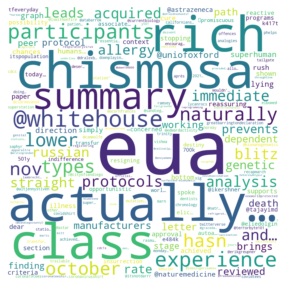

In [221]:
#create word cloud for all column
w = dict(freq_hi['PMI'])
j = WordCloud(width=1000,height=1000, 
              background_color='white',
              prefer_horizontal=1).generate_from_frequencies(w)

plt.imshow(j, interpolation = 'bilinear')
plt.axis('off')

j.to_file(r"/Users/elisabethjones/GoogleDrive/Research2021/PMI_wordcloud_032021/0121_all.png")

In [223]:
#month
freq_hi.sort_values(by = 'month', ascending= False)[:15]

,All,month,PMI,words
people,74052,3167.0,1.319737,people
use,5538,2842.0,2.265155,use
immunity,12982,2792.0,1.010471,immunity
dose,4143,2192.0,2.309185,dose
today,9071,2002.0,1.047794,today
herd,6910,1745.0,1.242155,herd
don,3817,1743.0,2.096747,don
states,3697,1739.0,2.139516,states
@…,2045,1602.0,2.875387,@…
united,2243,1561.0,2.704654,united


In [ ]:
freq_hi['month'] = freq_hi['month'].astype(float)

<ipython-input-222-92846c02cbd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_hi['month'] = freq_hi['month'].astype(float)


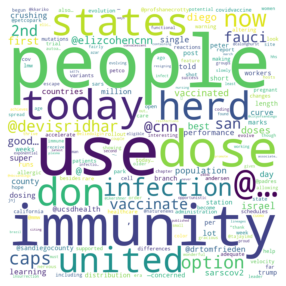

In [222]:
#create word cloud for month column
v = dict(freq_hi['month'])
i = WordCloud(width=1000,height=1000, 
              background_color='white', 
              prefer_horizontal=1).generate_from_frequencies(v)

plt.imshow(i, interpolation = 'bilinear')
plt.axis('off')

i.to_file(r"/Users/elisabethjones/GoogleDrive/Research2021/PMI_wordcloud_032021/0121_month.png")